<div style="padding: 45px">
<b>Проектная работа: маркетинговый анализ развлекательного приложения </b>

<b>Цель работы:</b> провести маркетинговый анализ развлекательного приложения Procrastinate Pro+ и выявить возможные причины убытков
Компания вкладывает значительные средства в маркетигн, но на протяжении последних нескольких месяцев терпит убытки. 
Необходимо выяснить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов
    
<b>Истончик данных:</b> данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы. 


### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [36]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt


In [37]:
visits = pd.read_csv(r'C:\Users\Vitte\OneDrive\Документы\Dataset\analis_biznes\visits_info_short.csv')
orders = pd.read_csv(r'C:\Users\Vitte\OneDrive\Документы\Dataset\analis_biznes\orders_info_short.csv')
costs = pd.read_csv(r'C:\Users\Vitte\OneDrive\Документы\Dataset\analis_biznes\costs_info_short.csv')

In [38]:
display(visits.head(5))
visits.info()
display(visits.duplicated().sum())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


0

приведем наименования столбцов в единый формат в нижнем регшистров и без пробелов

In [40]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]

In [41]:
#проверим наличие пропусков
visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [42]:
# приведем наименования столбцов в единый формат в нижнем регшистров и без пробелов
orders = orders.rename(columns={'User Id':'user_id', 'Event Dt':'event_dt','Revenue':'revenue'})

In [43]:
display(orders.head(5))
orders.info()
display(orders.duplicated().sum())

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


0

In [44]:
#проверим наличие пропусков
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [45]:
costs = costs.rename(columns={'Channel':'channel'})
display(costs.head(5))
costs.info()
display(costs.duplicated().sum())

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


0

In [46]:
#проверим наличие пропусков
costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

In [47]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Загружены данные из датасетов данные сохранены визиты в visits, покупки в orders, затраты в costs. В ходе предобработки даных наличие дубликатов и пропусков в данных не выявлены. Тип данных для столбцов с датой и временем преобразованы в формат datetime 

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [50]:
def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['week'] = profiles['first_ts'].dt.isocalendar().week
    profiles['month'] = profiles['first_ts'].dt.month
    profiles['year'] = profiles['first_ts'].dt.year


    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [51]:
# функция для расчёта удержания

def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


In [52]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [53]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [54]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [55]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=[]):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [56]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=[]):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [57]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=[]):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [59]:
profiles =  get_profiles(visits, orders, costs)
display(profiles.head(5))

,user_id,first_ts,channel,device,region,dt,week,month,year,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,19,5,2019,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,28,7,2019,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,40,10,2019,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,34,8,2019,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,40,10,2019,False,0.230769


In [60]:
min_dt = profiles['first_ts'].min()
max_dt = profiles['first_ts'].max()
days_num = (max_dt - min_dt).days
print('минимальная дата привлечения пользователей: ', min_dt)
print('максимальная дата привлечения пользователей: ', max_dt)
#print(days_num)

минимальная дата привлечения пользователей:  2019-05-01 00:00:41
максимальная дата привлечения пользователей:  2019-10-27 23:59:04


сформирована таблица с профилями пользователей. Самая ранняя дата привлечения 01.05.2019, самая поздняя дата привлечения 27.10.2019.

In [62]:
profiles_region = profiles.pivot_table(index='region', columns='payer', values='user_id', aggfunc = 'count').rename(columns={False: 'no_payer', True: 'payer'})
profiles_region['%_in_total'] = (profiles_region['payer']/(profiles_region['payer']+profiles_region['no_payer'])*100).round(1)
profiles_region = profiles_region.sort_values('%_in_total', ascending=False)
display(profiles_region)

payer,no_payer,payer,%_in_total
region,,,
United States,93100,6902,6.9
Germany,14365,616,4.1
UK,16875,700,4.0
France,16787,663,3.8


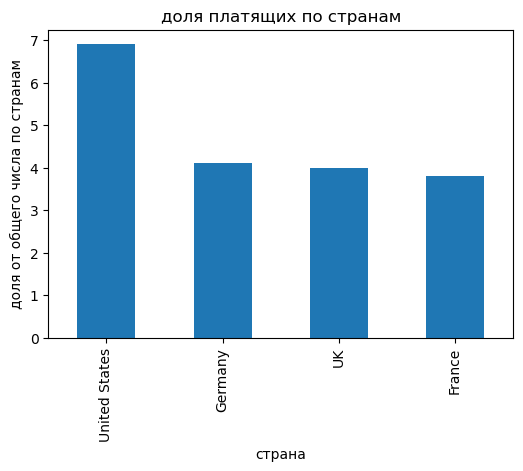

In [63]:
profiles_region.plot(y = '%_in_total', kind='bar', figsize=(6,4), legend = False)
plt.title('доля платящих по странам')
plt.xlabel('страна')
plt.ylabel('доля от общего числа по странам')
plt.show()

Наибольшая доля платящих из выборки приходится на США с долей 6,9%, далее следую Германия - 4,1%, Великобритания - 4,0%, Франция - 3,8% 

In [65]:
profiles_region = profiles.pivot_table(index='device', columns='payer', values='user_id', aggfunc = 'count').rename(columns={False: 'no_payer', True: 'payer'})
profiles_region['%_in_total'] = (profiles_region['payer']/(profiles_region['payer']+profiles_region['no_payer'])*100).round(1)
profiles_region = profiles_region.sort_values('%_in_total', ascending=False)
display(profiles_region)

payer,no_payer,payer,%_in_total
device,,,
Mac,28130,1912,6.4
iPhone,51097,3382,6.2
Android,32982,2050,5.9
PC,28918,1537,5.0


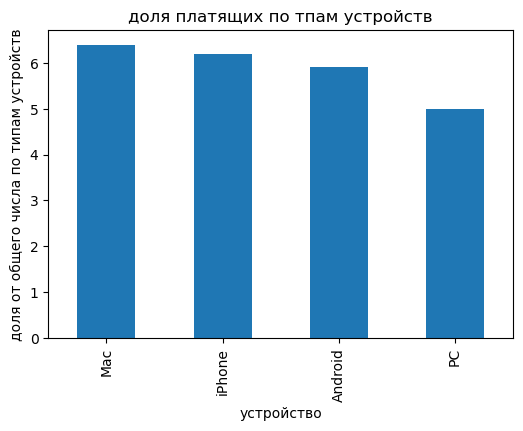

In [66]:
profiles_region.plot(y = '%_in_total', kind='bar', figsize=(6,4), legend = False)
plt.title('доля платящих по тпам устройств')
plt.xlabel('устройство')
plt.ylabel('доля от общего числа по типам устройств')
plt.show()

Наибольшая доля у платящи пользователй по используемым устройствам занимают устройствва MAC с долей 6,4%, IPhone - 6,2%, Android-5,9% , PC - 5,0%

In [68]:
profiles_region = profiles.pivot_table(index='channel', columns='payer', values='user_id', aggfunc = 'count').rename(columns={False: 'no_payer', True: 'payer'})
profiles_region['%_in_total'] = (profiles_region['payer']/(profiles_region['payer']+profiles_region['no_payer'])*100).round(1)
profiles_region = profiles_region.sort_values('%_in_total', ascending=False)
display(profiles_region)

payer,no_payer,payer,%_in_total
channel,,,
FaceBoom,25587,3557,12.2
AdNonSense,3440,440,11.3
lambdaMediaAds,1924,225,10.5
TipTop,17683,1878,9.6
RocketSuperAds,4096,352,7.9
WahooNetBanner,8100,453,5.3
YRabbit,4147,165,3.8
MediaTornado,4208,156,3.6
LeapBob,8291,262,3.1


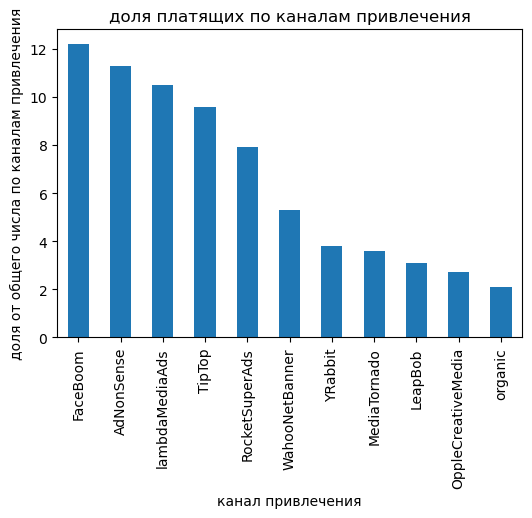

In [69]:
profiles_region.plot(y = '%_in_total', kind='bar', figsize=(6,4), legend = False)
plt.title('доля платящих по каналам привлечения')
plt.xlabel('канал привлечения')
plt.ylabel('доля от общего числа по каналам привлечения')
plt.show()

По каналам привлечения среди платящих пользователей первый 3 места у FaceBoom с долей 12,2% , AdNonSense - 11,3%, lambdaMediaAds - 10,5%. Наименьшая доля платящий у каналов привлечения LeapBob - 3,1%, OppleCreativeMedia - 2,7%б organic - 2,1%

Сформированы таблица с профилями пользователей. Самая ранняя дата привлечения 01.05.2019, самая поздняя дата привлечения 27.10.2019. 
- Наибольшая доля платящих из выборки приходится на США с долей 6,9%, далее следую Германия - 4,1%, Великобритания - 4,0%, Франция - 3,8% 
- Наибольшая доля у платящи пользователй по используемым устройствам занимают устройствва MAC с долей 6,4%, IPhone - 6,2%, Android-5,9% , PC - 5,0%
- По каналам привлечения среди платящих пользователей первый 3 места у FaceBoom с долей 12,2% , AdNonSense - 11,3%, lambdaMediaAds - 10,5%. Наименьшая доля платящий у каналов привлечения LeapBob - 3,1%, OppleCreativeMedia - 2,7%, organic - 2,1%

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

общая сумма расходдов на маркетинг:  105497.3


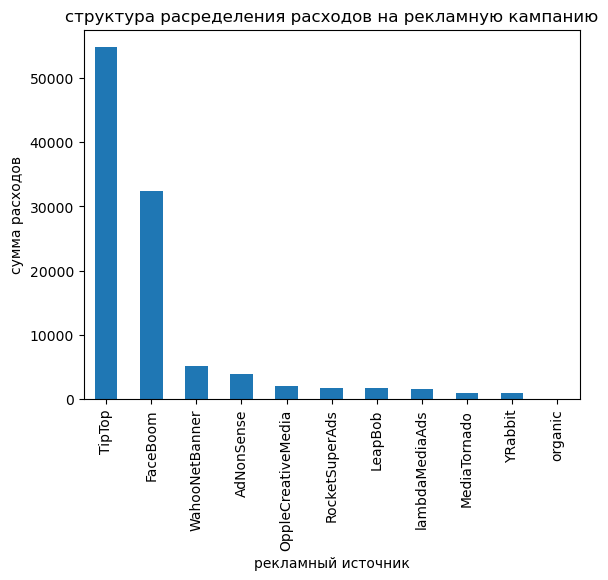

,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


In [73]:
profiles_costs_all = profiles['acquisition_cost'].sum().round(1)
print('общая сумма расходдов на маркетинг: ', profiles_costs_all)

profiles_costs = profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc = 'sum').sort_values('acquisition_cost', ascending=False)

profiles_costs.plot(kind = 'bar', legend = False)

plt.title('структура расределения расходов на рекламную кампанию')
plt.xlabel('рекламный источник')
plt.ylabel('сумма расходов')
plt.show()
#profiles_costs['%_in_total'] = (profiles_costs['costs']/(profiles_region['payer']+profiles_region['no_payer'])*100).round(1)
#profiles_costs = profiles_region.sort_values('%_in_total', ascending=False)
display(profiles_costs)

всего на маркетинг потрачено 105497,3 В топ-3 по наибольшей сумме в разрезе каналов привлечения TipTop 54751,3, FaceBoom 32445,6, WahooNetBanner 5151, меньше всего было распределено рекламного бюджета на платорму YRabbit - 944,22. На канал organic затраты 0, т.к. пользователи приходили самостоятельно

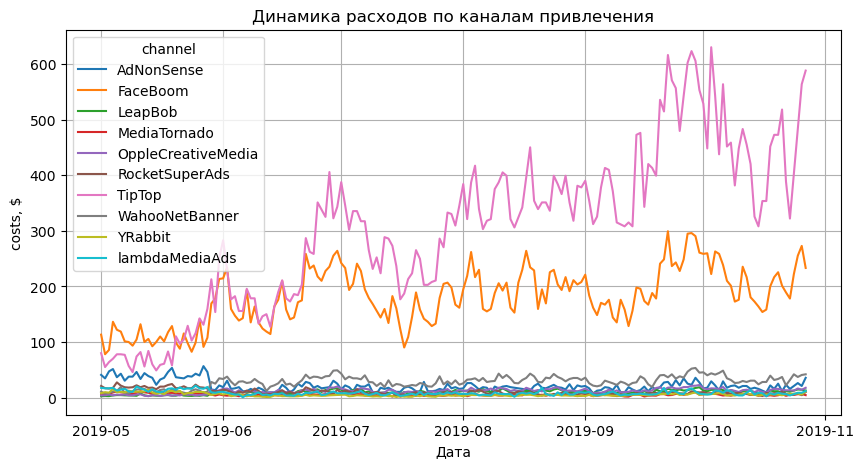

In [75]:
# строим график истории изменений CAC по каналам привлечения по неделям

costs.pivot_table(
    index='dt', columns='channel', values='costs', aggfunc='sum'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('costs, $')
plt.xlabel('Дата')
plt.title('Динамика расходов по каналам привлечения')
plt.show()

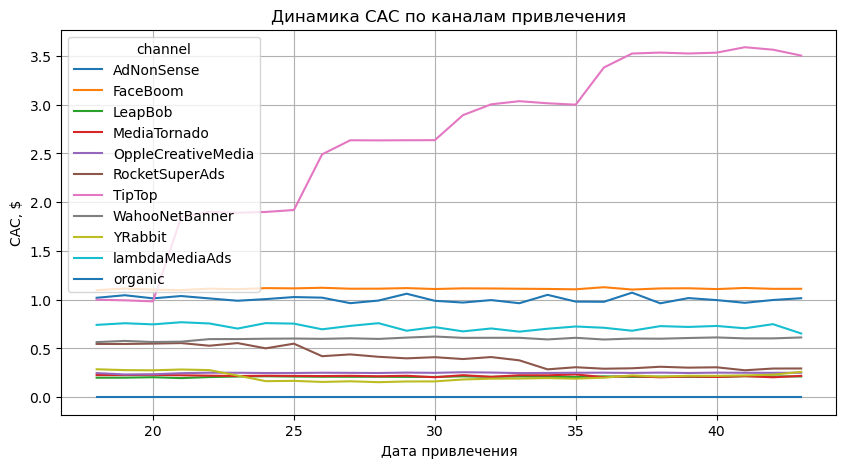

In [76]:
# строим график истории изменений CAC по каналам привлечения по неделям

profiles.pivot_table(
    index='week', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

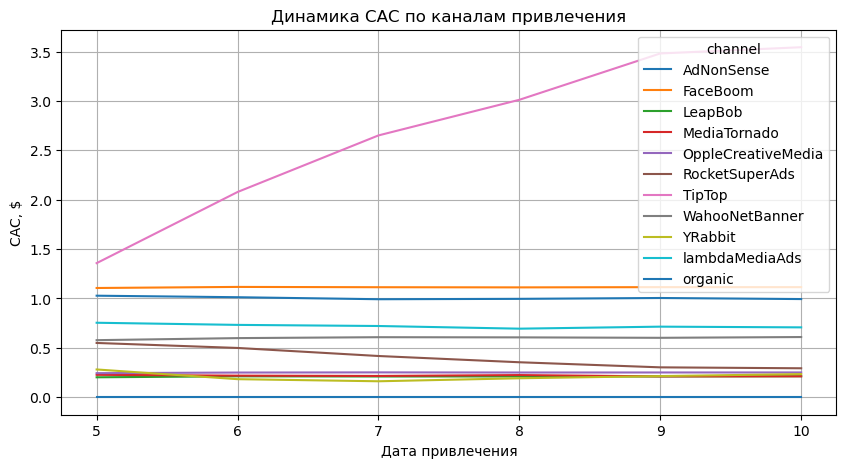

In [77]:
# строим график истории изменений CAC по каналам привлечения по месяцам

profiles.pivot_table(
    index='month', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

In [78]:
display(profiles.pivot_table(
    index='month', columns='channel', values='acquisition_cost', aggfunc='mean').round(3))

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds,organic
month,,,,,,,,,,,
5,1.028,1.106,0.202,0.227,0.244,0.549,1.357,0.578,0.281,0.754,0.0
6,1.012,1.117,0.212,0.218,0.250,0.499,2.078,0.598,0.183,0.732,0.0
7,0.992,1.114,0.210,0.215,0.252,0.417,2.651,0.608,0.161,0.721,0.0
8,0.996,1.112,0.210,0.224,0.250,0.354,3.011,0.606,0.192,0.694,0.0
9,1.005,1.114,0.210,0.211,0.251,0.302,3.480,0.601,0.214,0.714,0.0
10,0.994,1.114,0.212,0.212,0.251,0.293,3.544,0.609,0.234,0.707,0.0


графики динамики изменения расходов во времени по каждому истонику по неделям и по месяцам наглядно демностириует, что по большинству каналов расходы находятся на практически на одном уровне и только по каналу RocketSuperAds наблюдаеся снижене стоимости привлечения 1 пользователя. Самым дорогим для привлечения оказался канал TipTop. Здесь стоимость привлчения 1 пользователя составляет почти 3,5 на конез анализируемого периода. При этом изначально это был самы дорогой канал, а каждую неделю приходит рост еще примерно на 0,5.

    Всего на маркетинг потрачено 105497,3 В топ-3 по наибольшей сумме в разрезе каналов привлечения TipTop 54751,3, FaceBoom 32445,6, WahooNetBanner 5151, меньше всего было распределено рекламного бюджета на платорму YRabbit - 944,22. На канал organic затраты 0, т.к. пользователи приходили самостоятельно
    
    Графики динамики изменения расходов во времени по каждому истонику по неделям и по месяцам наглядно демностириует, что по большинству каналов расходы находятся на практически на одном уровне и только по каналу RocketSuperAds наблюдаеся снижене стоимости привлечения 1 пользователя. Самым дорогим для привлечения оказался канал TipTop. Здесь стоимость привлчения 1 пользователя составляет почти 3,5 на конез анализируемого периода. При этом изначально это был самы дорогой канал, а каждую неделю приходит рост еще примерно на 0,5.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [82]:
profiles = profiles.query('channel != "organic"')

In [83]:
# зададим момент анализа 01.11.2019 и горизоннт анализа 14 дн.
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

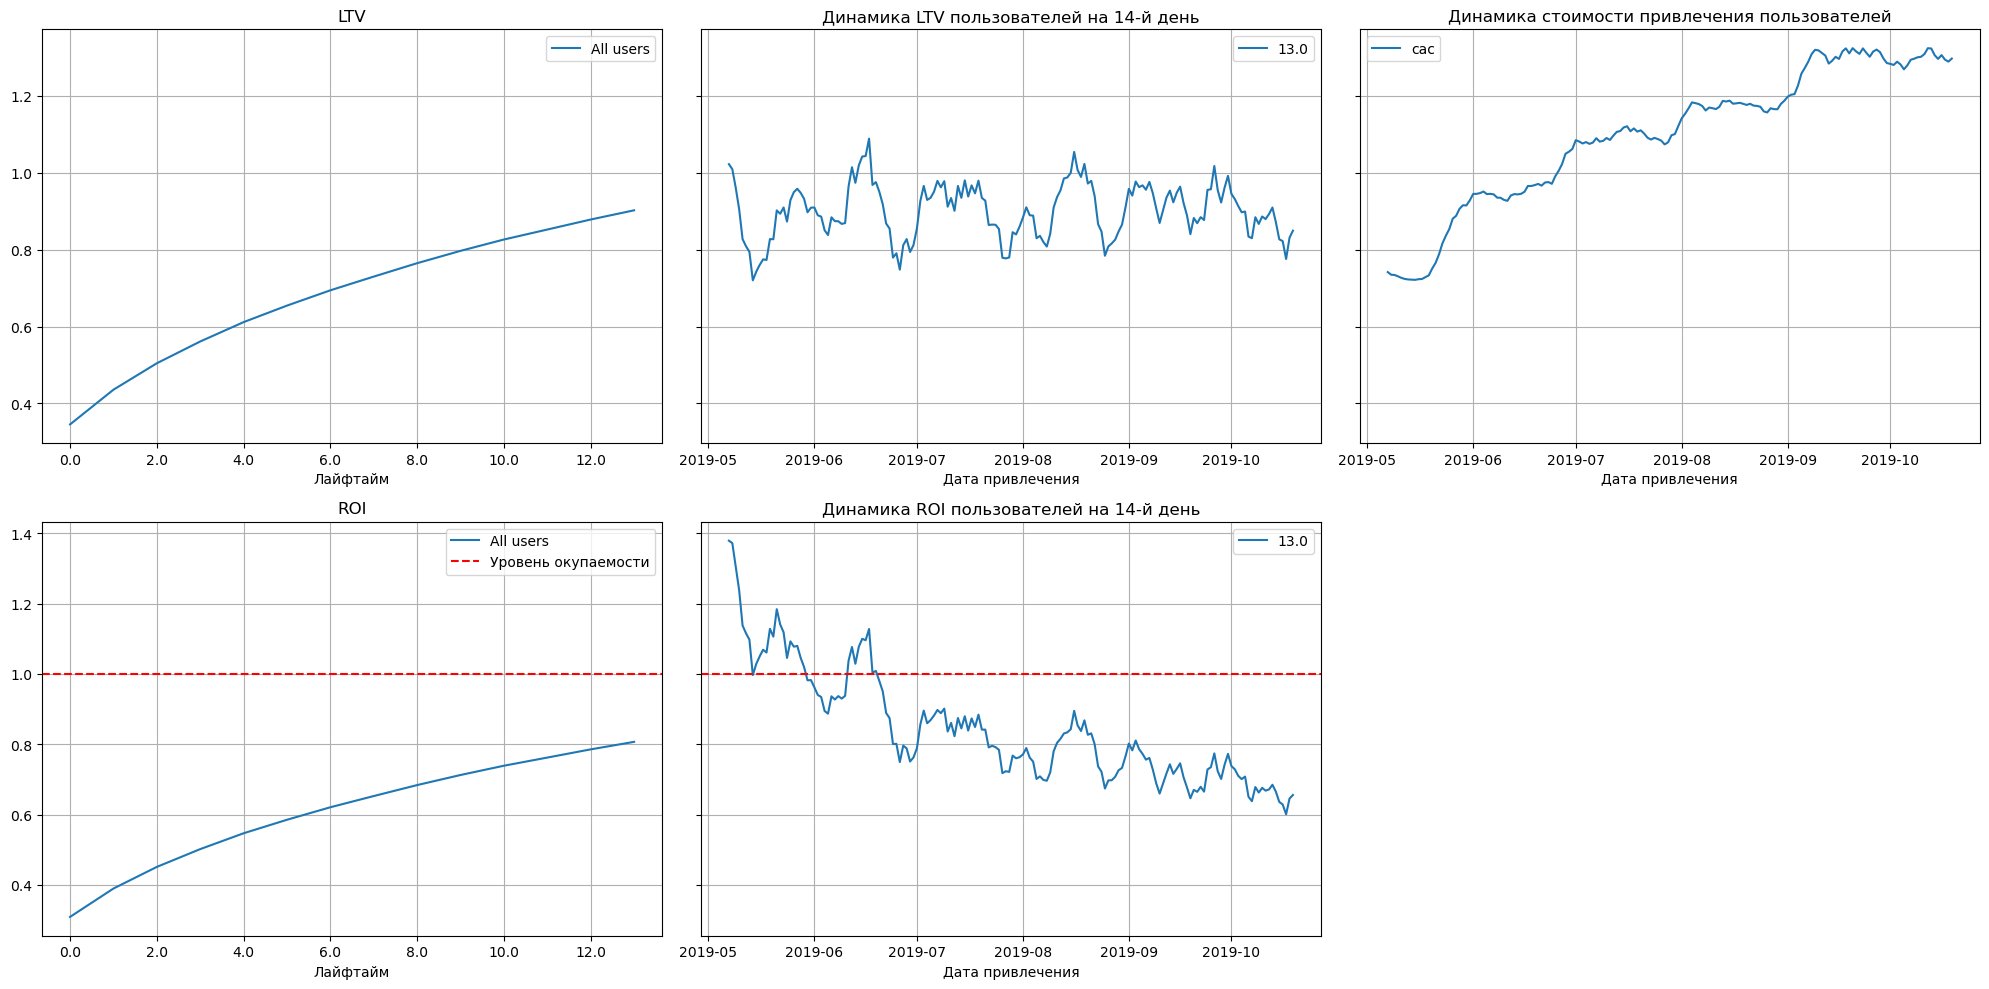

In [84]:
# смотрим окупаемость без разбивки

dimensions = []
window = 7

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = window
) 

Предположение что окупаемость наступает на 14 день не подтвердиось. ROI в конце 2й недели не достигает целевого показателя.
При этом CAC имеет тенденцию к росту. Вероятная причина в значительном увеличении рекламного бюджета, потеря интереа пользователей и их уход.
На LTV растет, динамика LTV . По динамике ROI что в мае временно, а начиная с примерно середины июня показатель уходит ниже окупаетмости. 

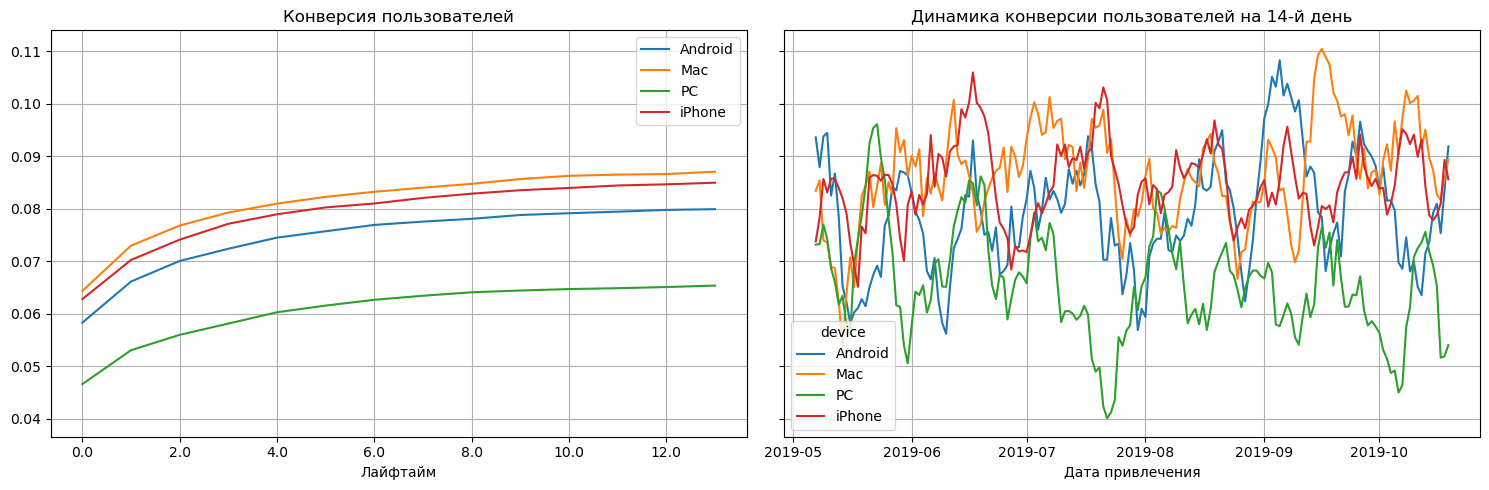

In [86]:
# смотрим конверсию с разбивкой по устройствам
window=7
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window= window)

Анализ графика показывает, что набиольшая конверсия у пользователей с такими устройств Mac и IPhone, меньшу у Android, у PC самая низкая конверсия.

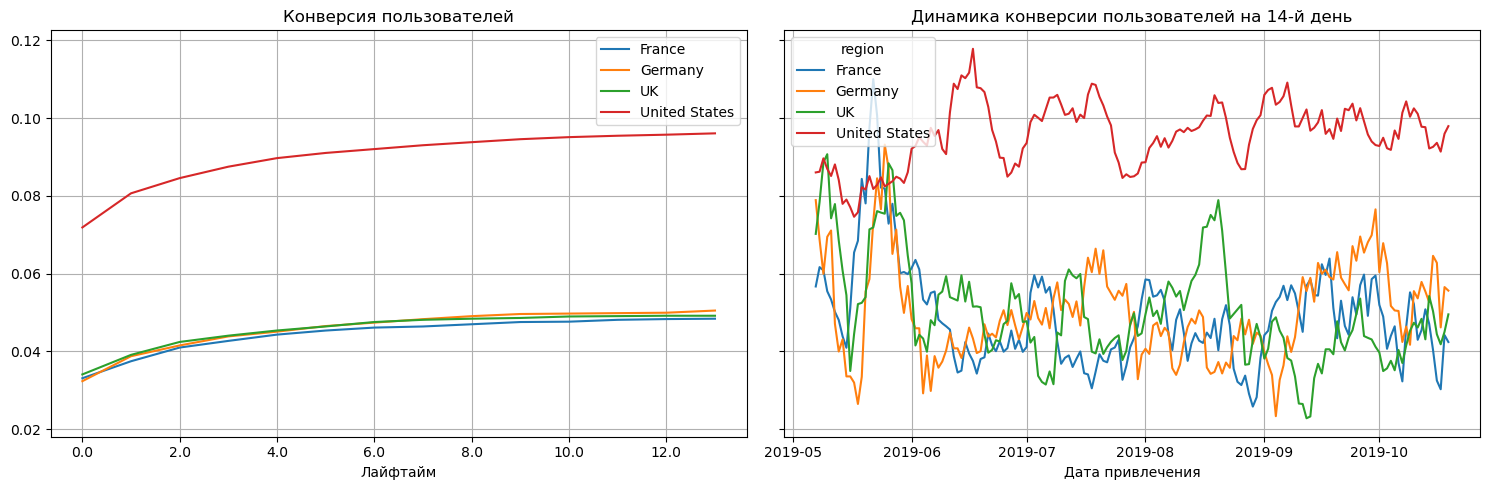

In [88]:
# смотрим конверсию с разбивкой по устройствам
window=7
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window= window)

больше всего конверсия у пользователей из США. конверсия по другим регионам находятся на примерно одинаковом уровне. То же самое видно на графике динамики конверсии. Пользователи из США показывают результат выше чем по другим странам

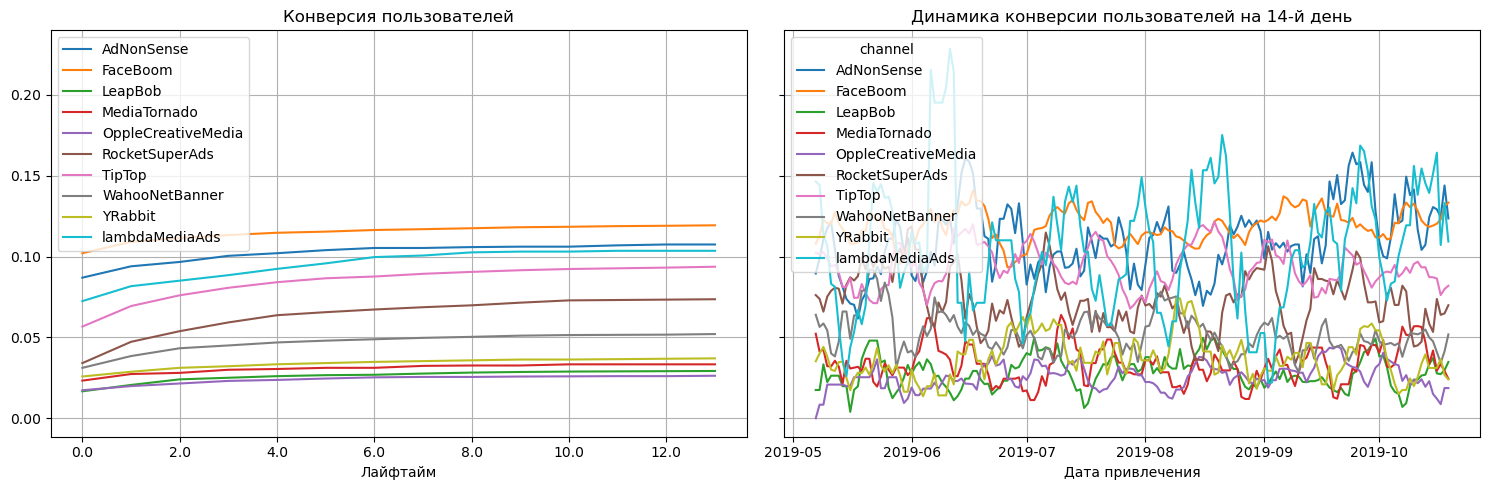

In [90]:
# смотрим конверсию с разбивкой по устройствам
window=7
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window= window)

наиболее эффективными с точки срезния конверсии ялвяются каналы FaceBoom, AdNonSense, LanmdaMediaAds TipTop.Для них конверсия составляет примерно 10% и выше. Среднее значения конверсии у каналов RocketSuperAds ~7%, WahooNetBanner ~5%. Наименее эффективны каналы YRabbit, MediaTornado, LeapBob, OppleCreativeMedia, которые показывают конверсию менее 5%.

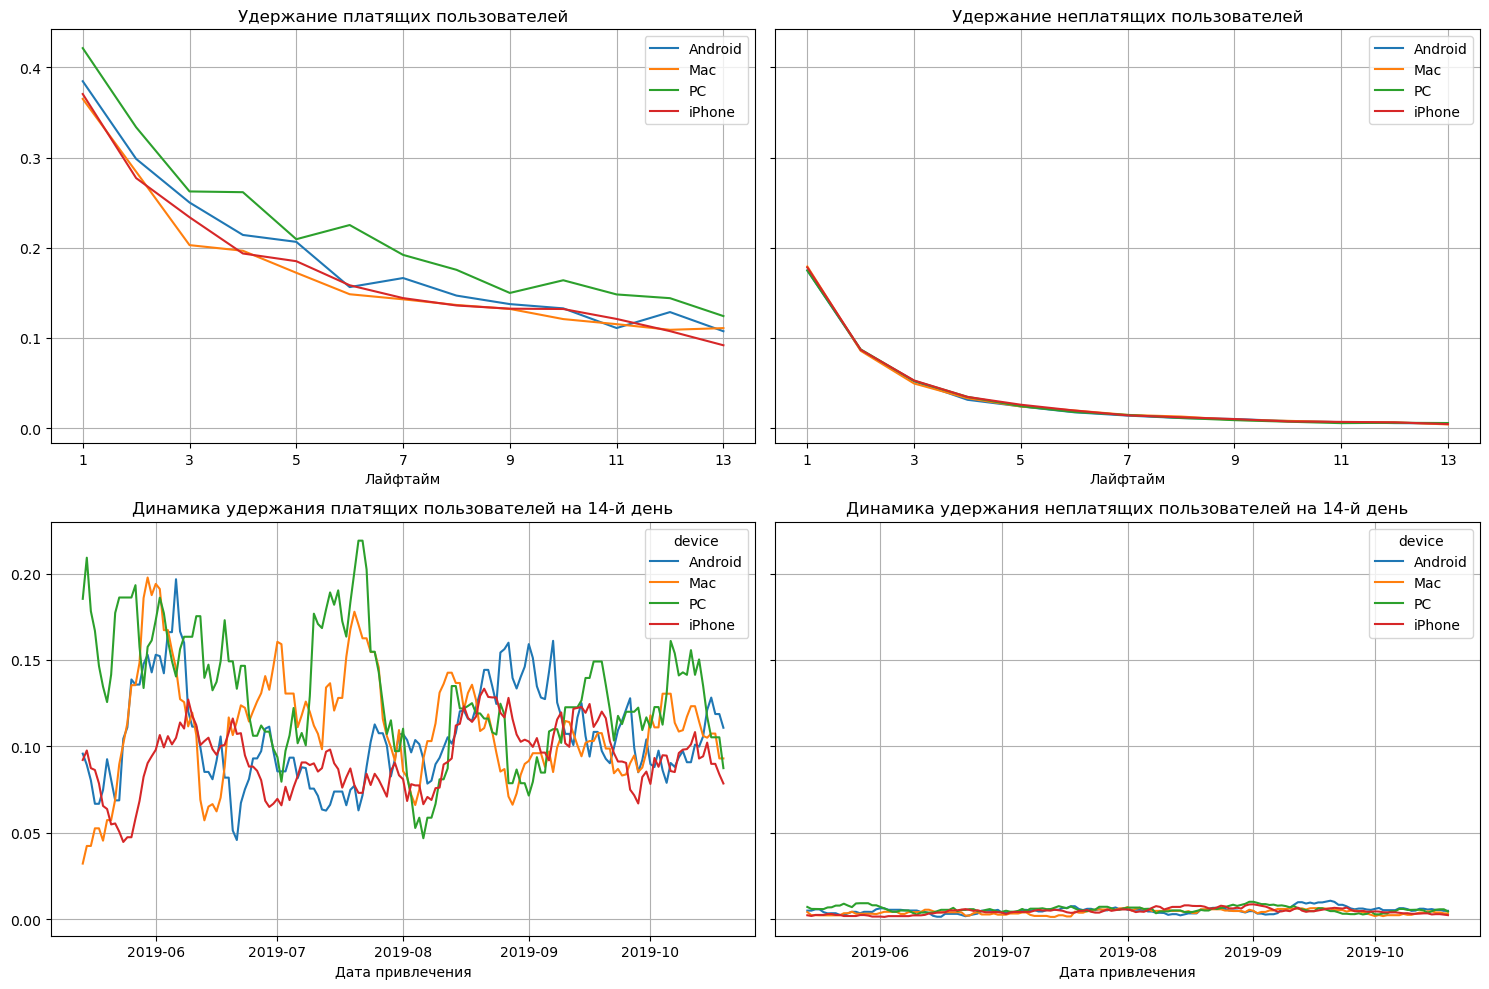

In [92]:
# смотрим удержание с разбивкой по устройствам
window=14
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days, window= window) 


    По неплатящим пользователям: скорее всего поведение этой категории схожее. Т.к. они не платят то какой то части из них или достаточно существующего бесплатного функционала, либо полностю не устравивает работа приложения и она остается не востребованным. Если смотретьь на удержание то оно стремится к 0, как и динамика удержания. В любом случае, интерес таких польщвоателей минимальный. Это может быть одной из точек роста: выяснить у неплатящих пользователей причины, по которым приложение не заинтересовало и его исполование довольно быстро сошло на нет.

Самый высокий по платящим показатель удержания у пользователей PC, Mac  и Android показывают сзожие показатели, а пользователи IPhone удерживаются хуже и на 14день показывают удержание ниже 10%. пользователи с IPhone в динамике удержания наиболее стаблильные, по другим сутсройствам, особенно для PC колебания значительные в динамике удержния - как значительные рост так и значительное снижение с примерно 20% до примерно 5%. К концу анализируемого периода динамика удержания по всем видам устройств приходит в диапазон примерно 7-11%

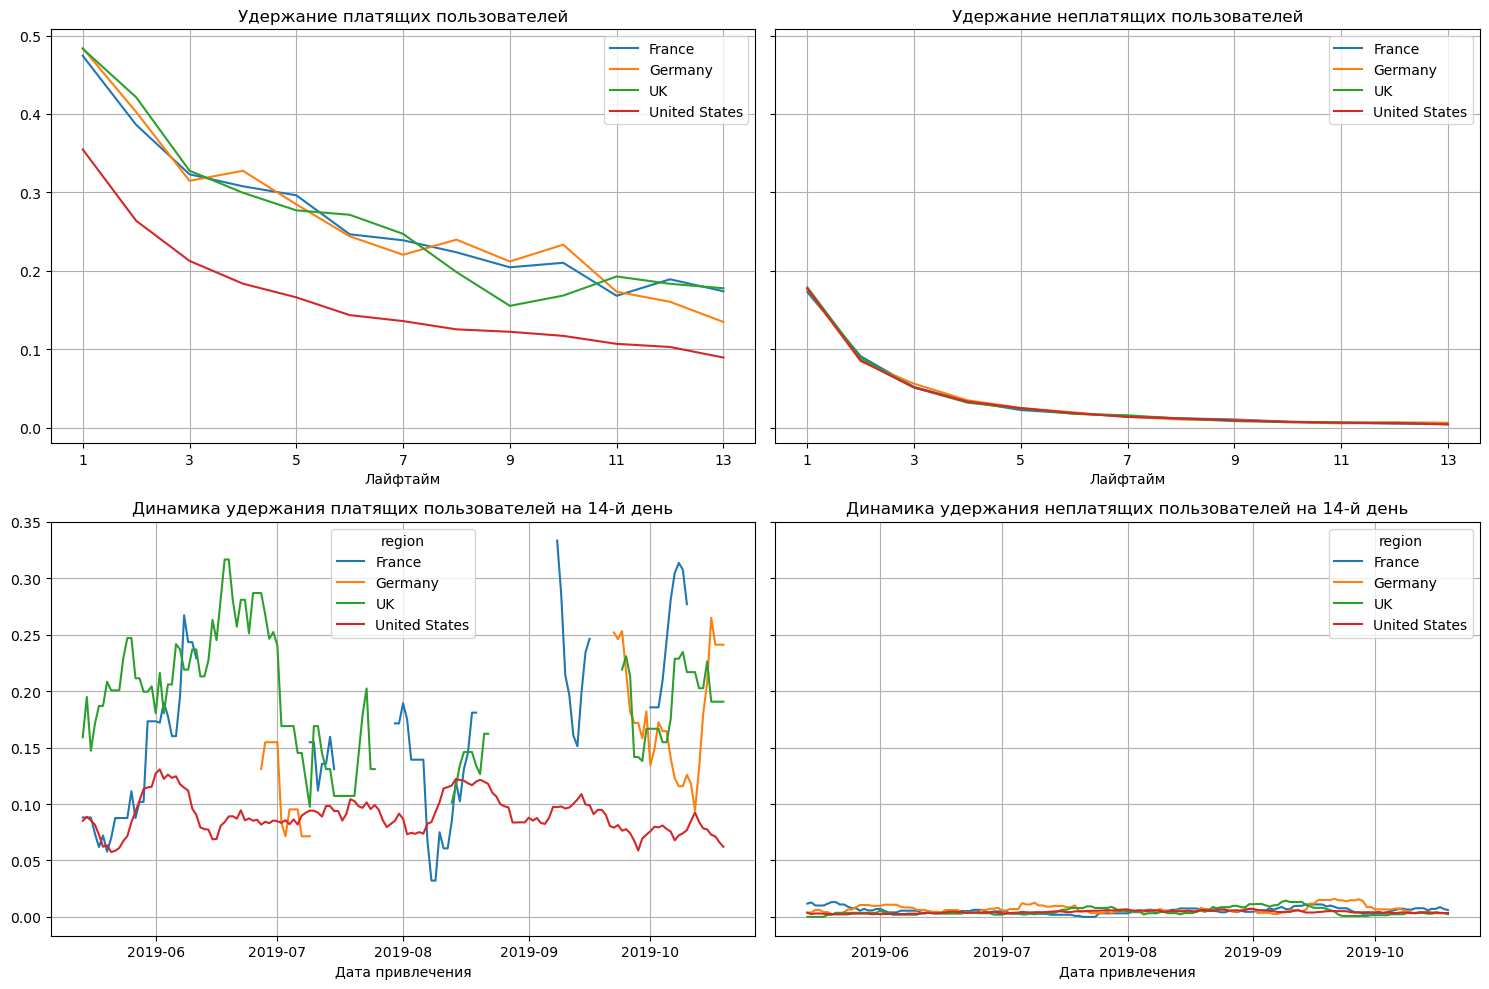

In [95]:
# смотрим удержание с разбивкой по региону
window=14
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days, window= window) 


Наименьшее удрежание платаящих пользователей демонстрируют пользователи из США. Лучше по данному на 14й день удержание у пользователей из Франции и Великобритании

region,France,Germany,UK,United States
channel,,,,
AdNonSense,1366.0,1219.0,1295.0,NaN
FaceBoom,NaN,NaN,NaN,29144.0
LeapBob,2988.0,2519.0,3046.0,NaN
MediaTornado,NaN,NaN,NaN,4364.0
OppleCreativeMedia,2991.0,2562.0,3052.0,NaN
RocketSuperAds,NaN,NaN,NaN,4448.0
TipTop,NaN,NaN,NaN,19561.0
WahooNetBanner,2971.0,2579.0,3003.0,NaN
YRabbit,NaN,NaN,NaN,4312.0


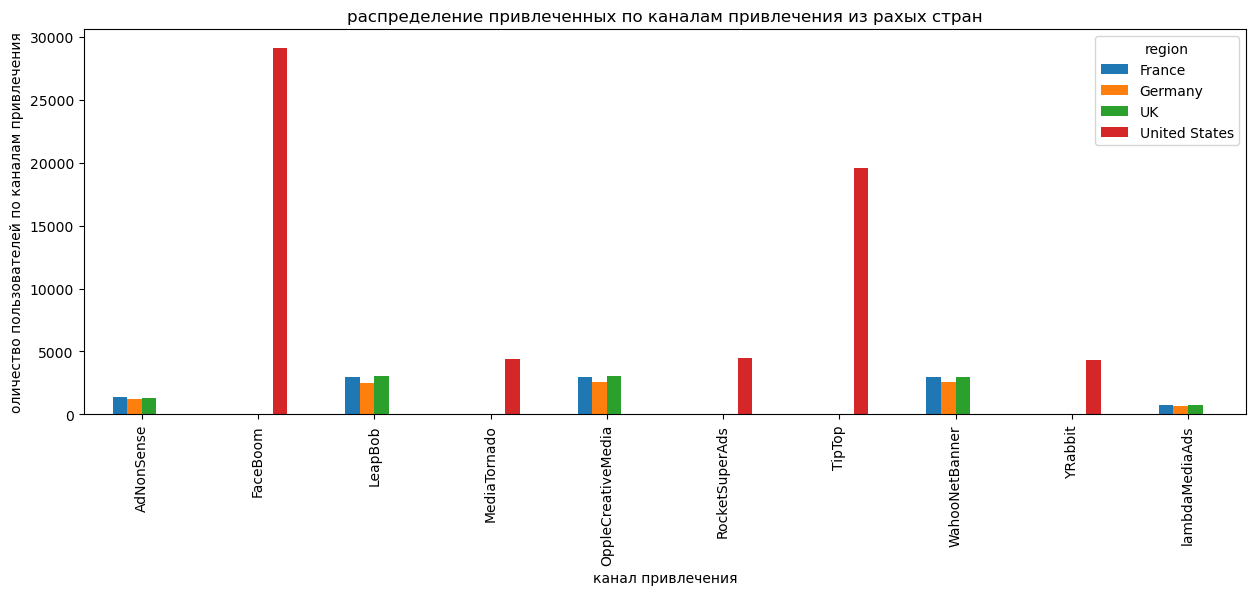

In [97]:
profiles_cannel = profiles.pivot_table(index='channel', columns='region', values='user_id', aggfunc = 'count').rename(columns={False: 'no_payer', True: 'payer'})
display(profiles_cannel)
profiles_cannel.plot(y = ['France', 'Germany', 'UK', 'United States'], kind='bar', figsize=(15,5))
plt.title('распределение привлеченных по каналам привлечения из рахых стран')
plt.xlabel('канал привлечения')
plt.ylabel('оличество пользователей по каналам привлечения')
plt.show()


    График распределения привлеченных пользователец по каналам в разрезе стран покахывает что для США с огромным отрывом лидируют каналы FaceBoom и TipTop . Кроме того пользователи из США являются самыми многочисленными. А каналы MediaTornado, RocketSuperAds Yrabbit нигде кроме как в США не пользуются популярностью

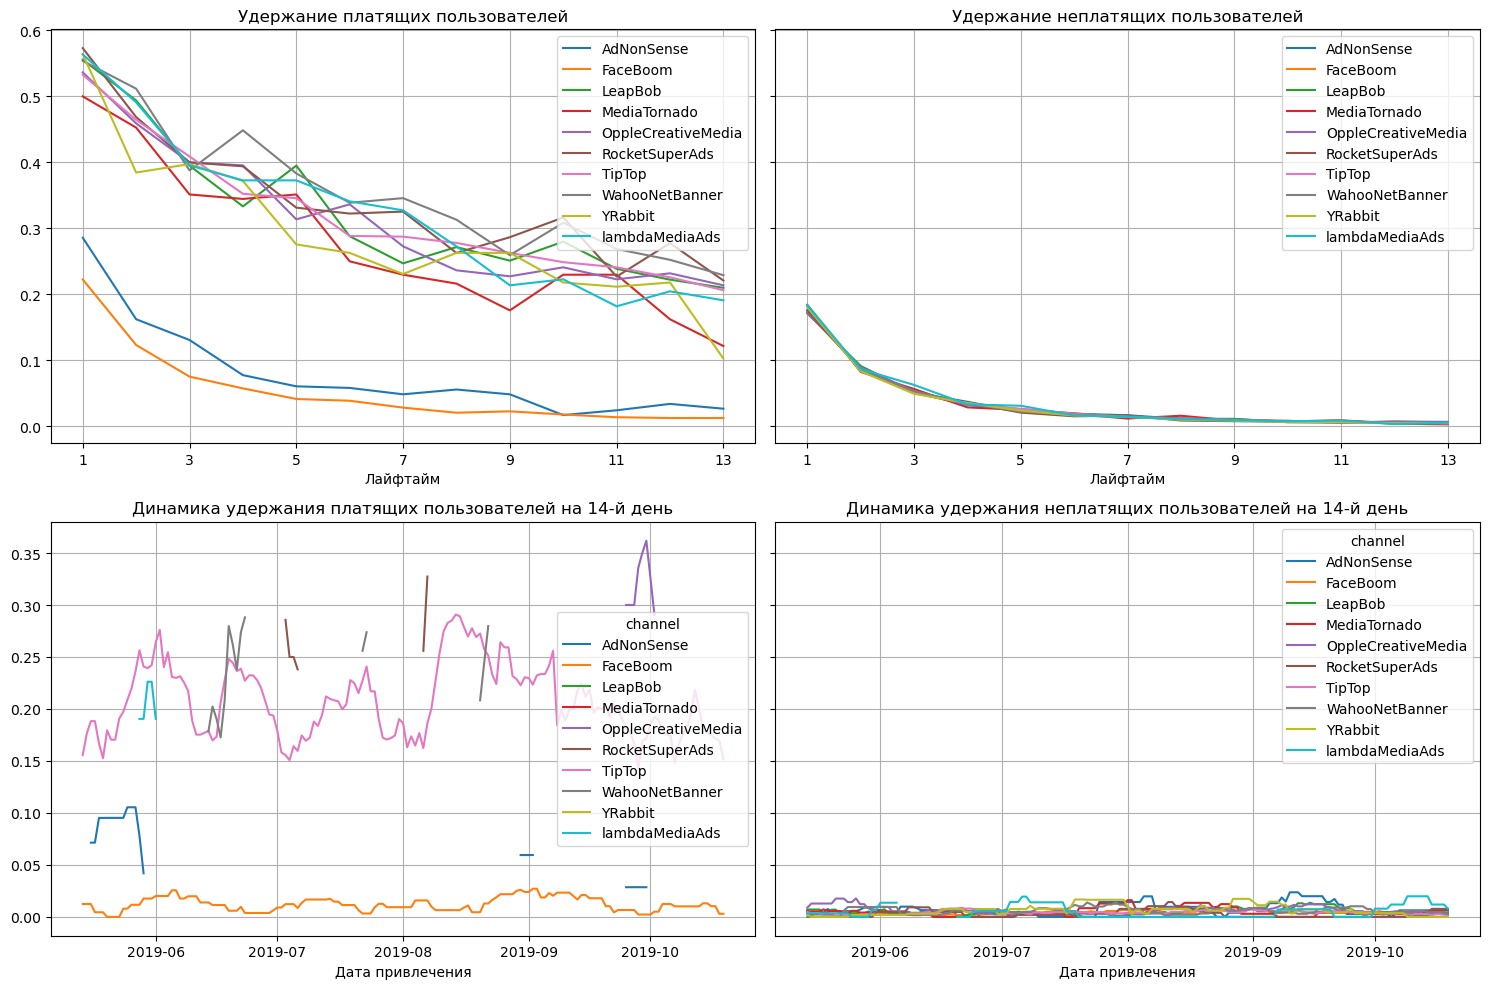

In [99]:
# смотрим удержание с разбивкой по каналам
window=14
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days, window= window) 


Платящие пользователи пришедшие с платформы FaceBoom и AdNonSence демонстрирую схожую  картину Это наименее эффективные каналы с точки зрения удержания пользователей, на 14й день удрежание близко к 0. По остальным канала удержнание показывает схожую картину и на конец 14дня показывают примерно 19-25%. Также стоит отметить, что на 14 день сильное снижение удержания показали каналы Mediatornado и YRabbit до почти 10%.  Динамика удежания такаже самая низкая у канала FaceBoom. Канал TipTop показывает достаточно высокую динамику, тогда как по остальным канала пользователей было недостаточно даже для отображения графика.

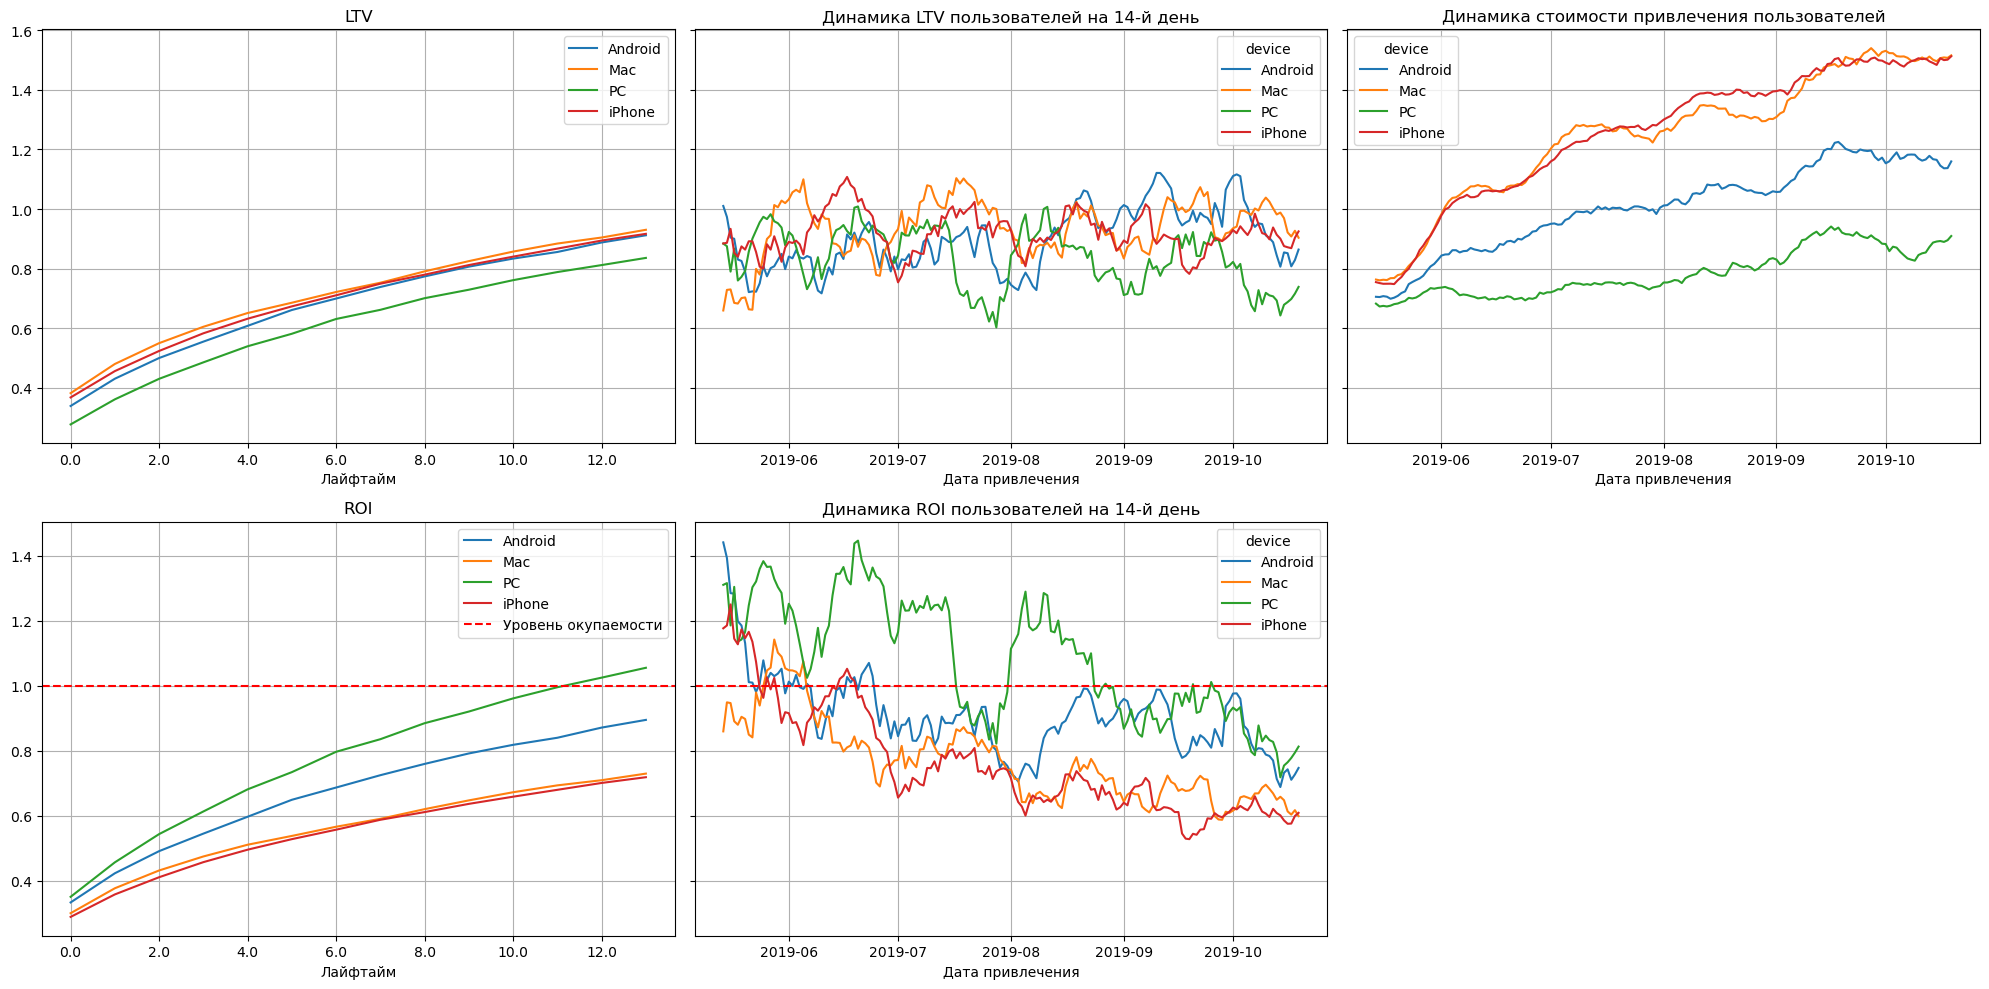

In [101]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']
window = 14

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = window
) 

При рассмотрении пользователей с точки зрения используемых типов устройств LTV смое низкое у PC, остальны типы устройств находятся на примерно одном уровне, а динамика стоимости привлечения для устройств MAC IPhone очень схожи и самая высокая. Средней по динамике стоимости привлечения пользователи с устройствами Android. Самая низкий показатель для пользователей PC. График ROI также подтвержает, что пользователи на устроствах MAC IPhone показывают схожую картину - на 14й день и при этом не достигаю окупаемости как и пользователи с устройствами Android. Только пользователи PC достигают окупаемости, при этом имеют самую низкую стоимость привлечния, в т.ч в динамике. По динамике ROI на 14й день с середины июля по устройств MAC IPhone Android показатель уходит в отрицательню, но и пользователия PC уже с конца августа также не выдерживают и увоят окупаемость в минус. Только иногда пользователи PC позже показывают окупаемость близкую к 0.

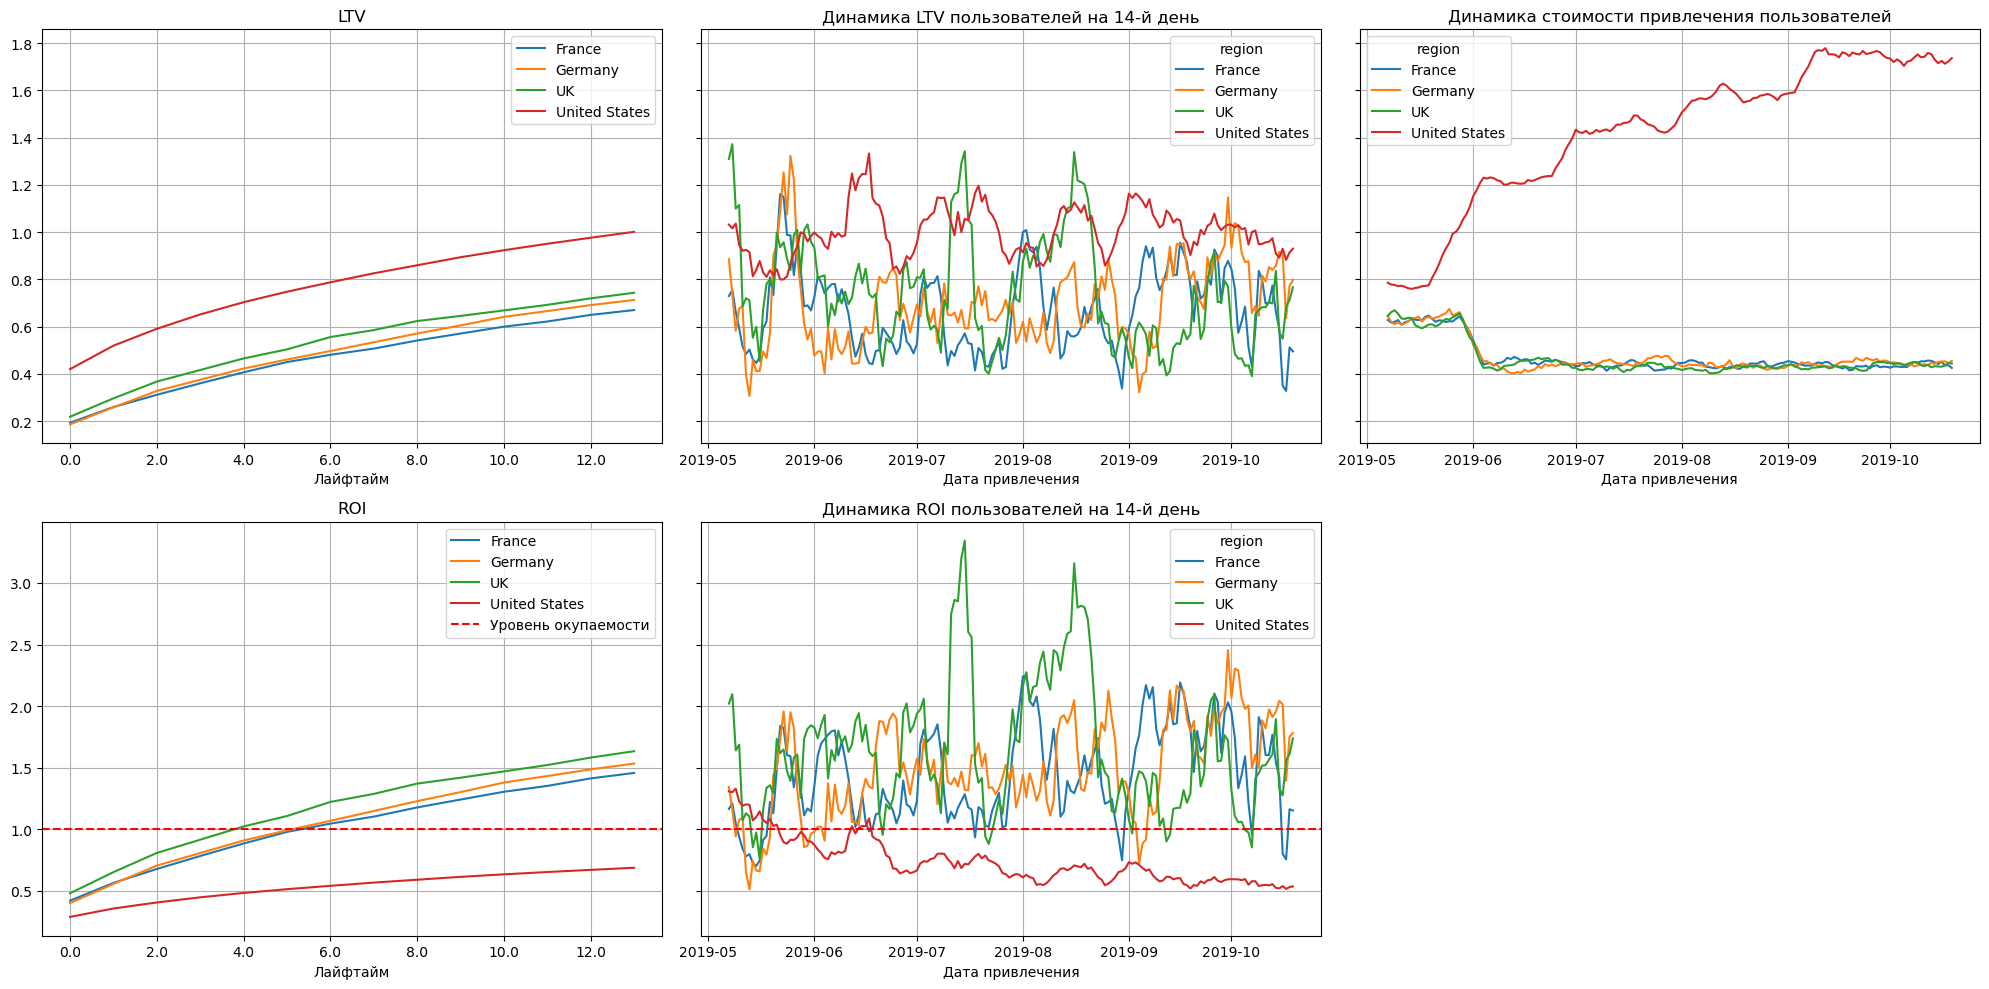

In [103]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']
window = 7

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = window
) 

С разбивкой по странам видно, что хоть и по США LTV растет больше, чем в сравнении с остальными странами, но показатели динамики имеет несоразмерный рост для данного региона. Кроме того, только по США ROI на конец 2й недели все еще ниже нормы окупаемости. По графику динаммики ROI только СШа уходит ниже, не достигая окупаемости в заданный 14 девный период.

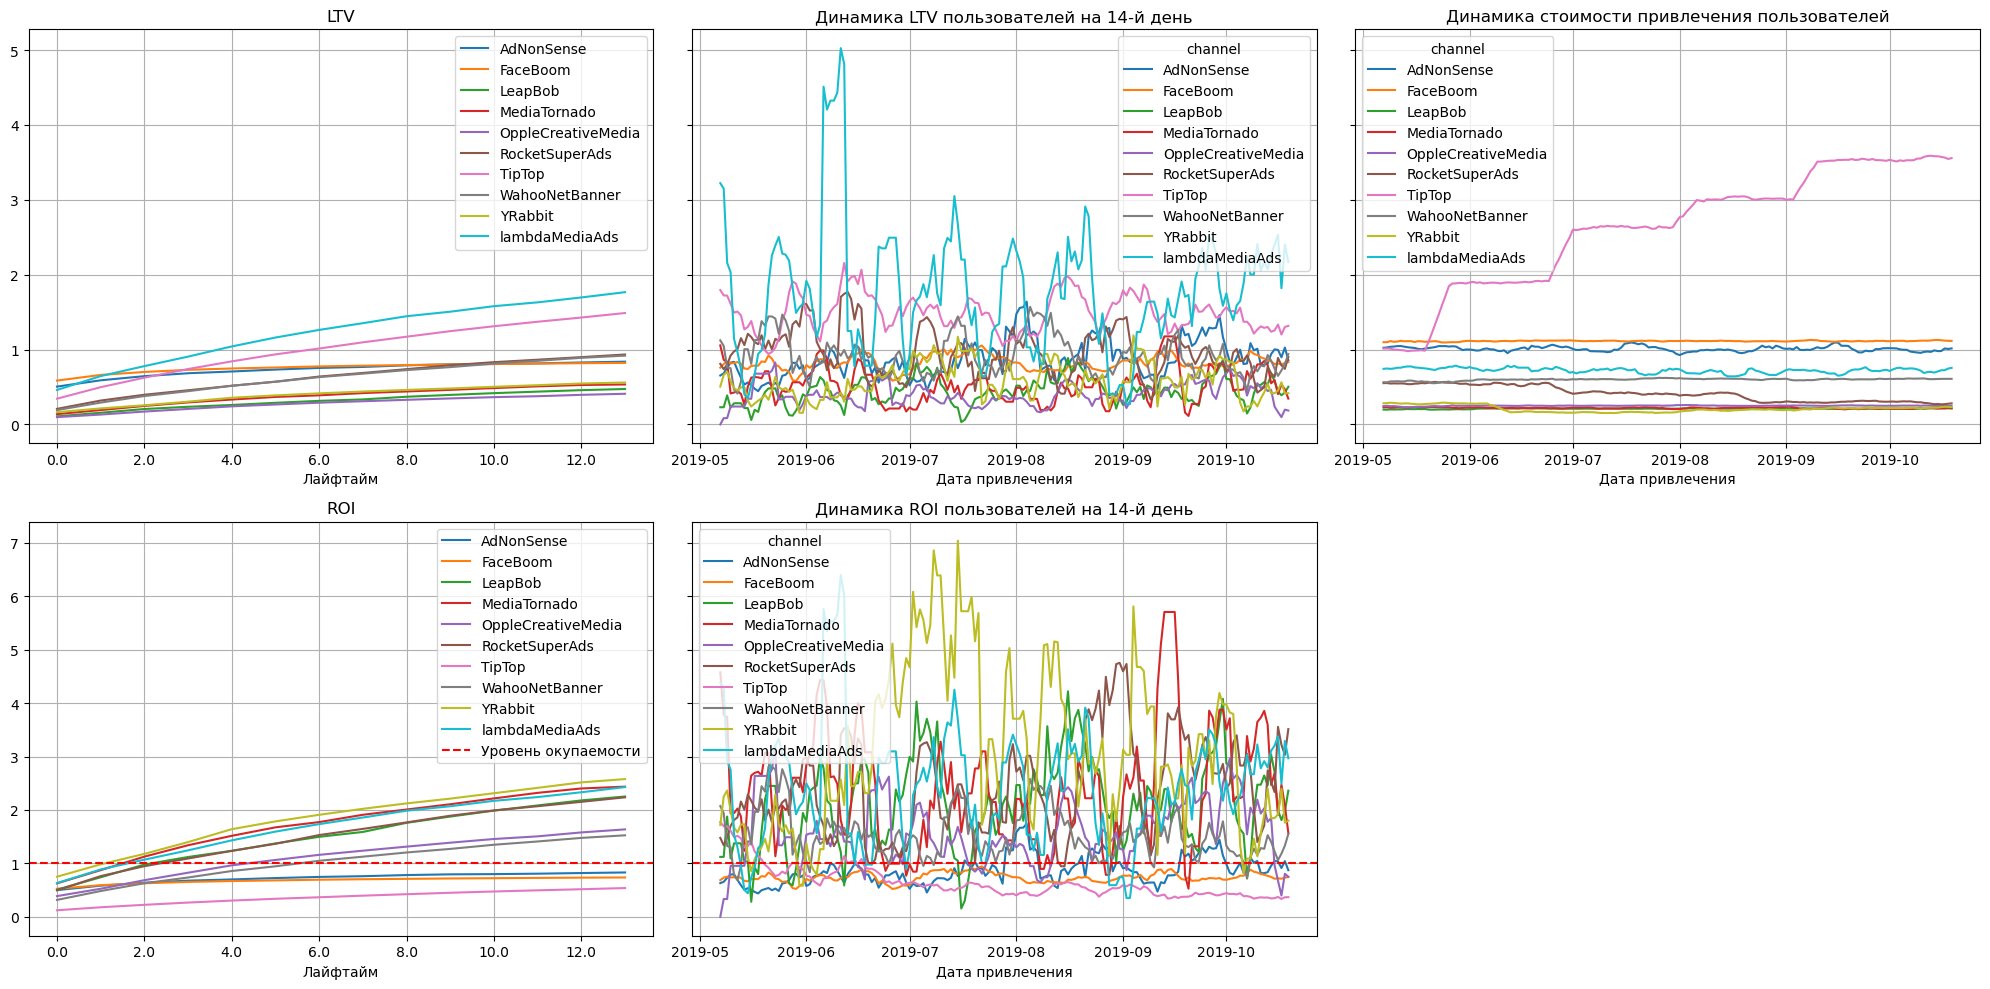

In [105]:
# смотрим окупаемость с разбивкой по каналам

dimensions = ['channel']
window = 7

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = window
) 

Анализ по каналам привлечения пользователей показывает, что наиболее дорогие каналы TipTop FaceBoom AdNonSense не дают положительного эффекта и их ROI на 14й день не достигает окупаемости. И если для каналов FaceBoom AdNonSense хоть и стоимость привлечения и является одной из самых высоки, но на протяжении всего периода остается отностительно стабильной, тогда как по каналу TipTop виден постоянный и значительный рост. Вероятно, меняется тарификация платормы и соотвевенно стоимость привлечения пользователей. Вероятно есть связь между типом устрйств и популярных у таких пользователей платформ и региона проживания. 

- Предположение что окупаемость наступает на 14 день не подтвердиось. ROI в конце 2й недели не достигает целевого показателя.
При этом CAC имеет тенденцию к росту. Вероятная причина в значительном увеличении рекламного бюджета, потеря интереа пользователей и их уход.
На LTV растет, динамика LTV . По динамике ROI что в мае временно, а начиная с примерно середины июня показатель уходит ниже окупаетмости. 
- набиольшая конверсия у пользователей с такими устройств Mac и IPhone, меньшу у Android, у PC самая низкая конверсия
- больше всего конверсия у пользователей из США. конверсия по другим регионам находятся на примерно одинаковом уровне. То же самое видно на графике динамики конверсии. Пользователи из США показывают результат выше чем по другим странам
- наиболее эффективными с точки срезния конверсии ялвяются каналы FaceBoom, AdNonSense, LanmdaMediaAds TipTop.Для них конверсия составляет примерно 10% и выше. Среднее значения конверсии у каналов RocketSuperAds ~7%, WahooNetBanner ~5%. Наименее эффективны каналы YRabbit, MediaTornado, LeapBob, OppleCreativeMedia, которые показывают конверсию менее 5%.
- Самый высокий по платящим показатель удержания у пользователей PC, Mac  и Android показывают сзожие показатели, а пользователи IPhone удерживаются хуже и на 14день показывают удержание ниже 10%. пользователи с IPhone в динамике удержания наиболее стаблильные, по другим сутсройствам, особенно для PC колебания значительные в динамике удержния - как значительные рост так и значительное снижение с примерно 20% до примерно 5%. К концу анализируемого периода динамика удержания по всем видам устройств приходит в диапазон примерно 7-11%
- Наименьшее удрежание платаящих пользователей демонстрируют пользователи из США. Лучше по данному на 14й день удержание у пользователей из Франции и Великобритании
- Платящие пользователи пришедшие с платформы FaceBoom и AdNonSence демонстрирую схожую  картину Это наименее эффективные каналы с точки зрения удержания пользователей, на 14й день удрежание близко к 0. По остальным канала удержнание показывает схожую картину и на конец 14дня показывают примерно 19-25%. Также стоит отметить, что на 14 день сильное снижение удержания показали каналы Mediatornado и YRabbit до почти 10%.  Динамика удежания такаже самая низкая у канала FaceBoom. Канал TipTop показывает достаточно высокую динамику, тогда как по остальным канала пользователей было недостаточно даже для отображения графика.
 

- При рассмотрении пользователей с точки зрения используемых типов устройств LTV смое низкое у PC, остальны типы устройств находятся на примерно одном уровне, а динамика стоимости привлечения для устройств MAC IPhone очень схожи и самые высокие. Средней по динамике стоимости привлечения пользователи с устройствами Android. Самая низкий показатель для пользователей PC. График ROI также подтвержает, что пользователи на устроствах MAC IPhone показывают схожую картину - на 14й день при этом не достигаю окупаемости как и пользователи с устройствами Android. Только пользователи PC достигают окупаемости, при этом имеют самую низкую стоимость привлечния, в т.ч в динамике. По динамике ROI на 14й день с середины июля по устройств MAC IPhone Android показатель уходит в отрицательню, но и пользователия PC уже с конца августа также не выдерживают и увоят окупаемость в минус. Только иногда пользователи PC позже показывают окупаемость близкую к 0. 
- С разбивкой по странам видно, что хоть и по США LTV растет больше, чем в сравнении с остальными странами, но показатели динамики имеет несоразмерный рост для данного региона. Кроме того, только по США ROI на конец 2й недели все еще ниже нормы окупаемости. По графику динаммики ROI только СШа уходит ниже, не достигая окупаемости в заданный 14 девный период.
- Анализ по каналам привлечения пользователей показывает, что наиболее дорогие каналы TipTop FaceBoom AdNonSense не дают положительного эффекта и их ROI на 14й день не достигает окупаемости. И если для каналов FaceBoom AdNonSense хоть и стоимость привлечения и является одной из самых высоки, но на протяжении всего периода остается отностительно стабильной, тогда как по каналу TipTop виден постоянный и значительный рост. Вероятно, меняется тарификация платормы и соотвевенно стоимость привлечения пользователей. Вероятно есть связь между типом устрйств и популярных у таких у них платформ и региона проживания.  

В целом реклама не окупается в заданный период времени. Однако следует обратить внимание, что отрицательную динамику думонстрируют отдельные категории. Так, пользователи из США, пользователи MAC и IPhone, пользователи из каналов пивлечения TipTop FaceBoom AdNonSense не достигли окупаемоси в заданный период времни. 
Вероятно причиной может служить достаточно быстрое охлаждение интереса у пользователей со временем либо какие-то технические сложности, рост стоимости привлечения 1 пользователя несразмерный с выручкой от поьзователей, технические сбои или некорректно отображение контента на устройствах с указанными ОС.


### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

В итогам исследования можно сделать следующие выводы: не смотря на высокие показатели LTV и конверсии пользователи из США с устройствами под управлением MAC и IPhone, пришедшие в приложение через каналы TipTop FaceBoom AdNonSense не дают положительного экономиеского эффекта. Они достаточно быстро "отваливаются", стоиост привлечения по 1 пользователя выше по сравнению с другими каналами, а для канала TipTop ко всему прочему имеет тенденуию к существенному росту. И получается что не смотря на более выокие значения LTV и конверсии затраты на такого пользователя выше чем выручка от них. 

Необходимо пересмотреть условия привлечения в части стоимости по указанным каналам, а возможно отказатьс вовсе, в пользу менее дорогих каналов, но с увеличением маркетингового бюджета в их пользу. Ввиду попуярности в США устройств под управлением MAC и IPhone а также тот факт что только пользователи из США не достигли окупаемости стоит обратить внимание на работоспособность приложения и качество отображаемого контента для таких устройств, а так же для устройств под управлением Android. Вероятная причина быстрого ухода пользователей может быть именно в технической плоскости.
Будет плюсом сфомировать типовой портрет пользователя нашего прилжения и адаптировать рекламную кампанию под него.


    Вероятнее всего на каналы FaceBoom и TipTop делался упор, т.к. они самые популярные у подавляюего большинства пользователей и высокой конверсии, без оглядки на эффективность. Возмжно ставилась задача по привлечению пользователей и повышению конверсии как ключевых параметров оченки эффективности маркетинга. Но практика показывает, что деятельность компании всегда следуют рассматривать в комплексе и с разных сторон.  
